<a href="https://colab.research.google.com/github/vishalkharde/ANN_implimentaion/blob/main/ANN_implimentation_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf


In [ ]:
tf.__version__

'2.6.0'

In [ ]:
tf.keras.__version__

'2.6.0'

#keras is high level API for tensorflow

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
mnist=tf.keras.datasets.mnist

In [ ]:
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

In [ ]:
X_train_full.shape 

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

image each pixel is 0 to 255 hence itis 8 bit  because of 2^8

In [ ]:
X_train_full[0].shape

(28, 28)

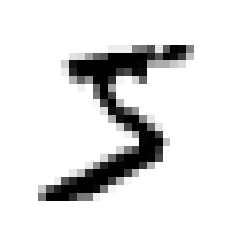

In [ ]:
img=X_train_full[0]
plt.imshow(img,cmap='binary')
plt.axis('off')
plt.show()

In [ ]:
y_train_full.shape

(60000,)

In [ ]:
img.max(),img.min()

(255, 0)

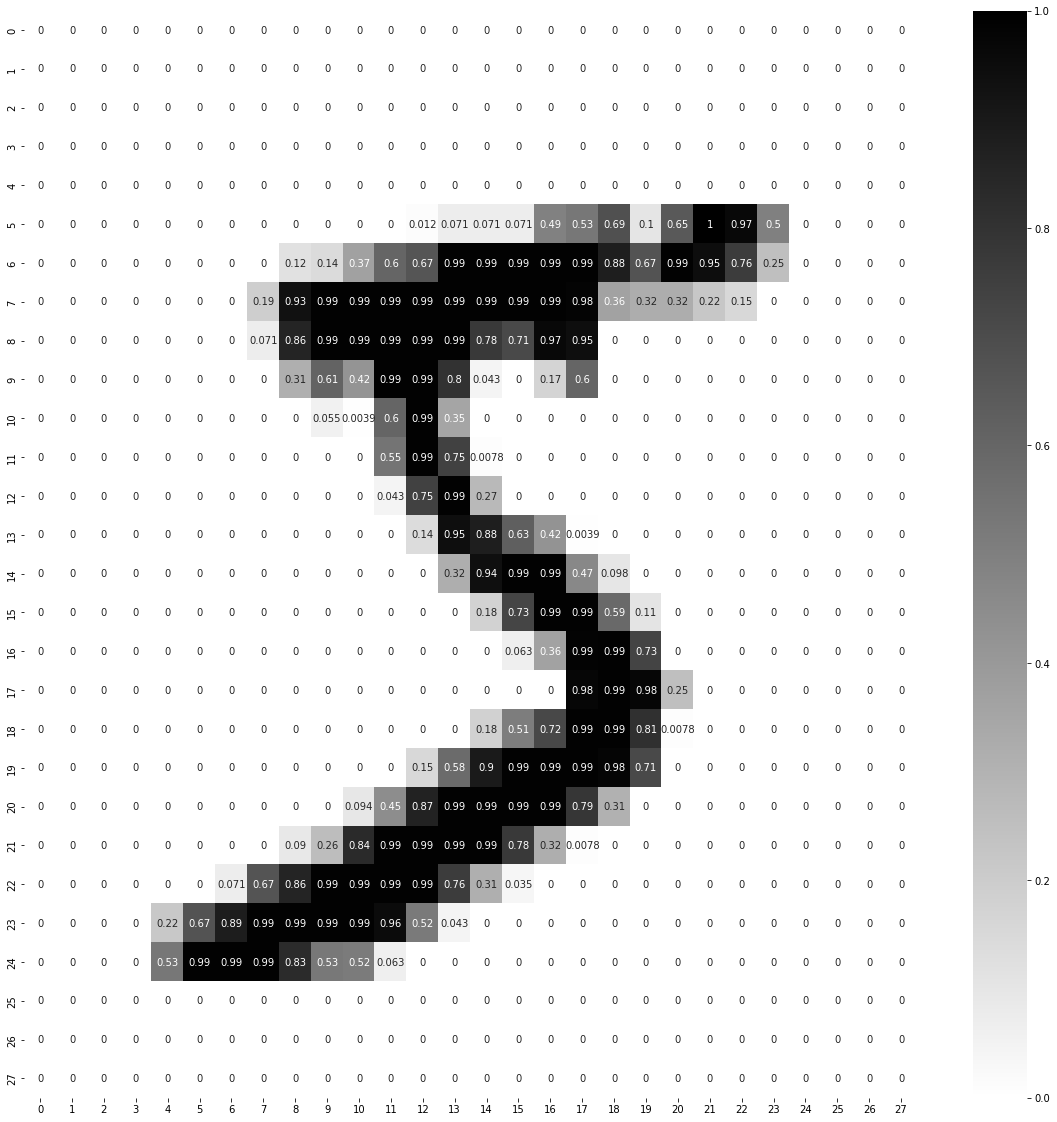

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(img/255,annot=True,cmap='binary')

In [ ]:
X_valid,X_train=X_train_full[:5000]/255,X_train_full[5000:]/255
y_valid,y_train=y_train_full[:5000]/255,y_train_full[5000:]/255
X_test=X_test/255

In [ ]:
LAYERS=[ 
        tf.keras.layers.Flatten(input_shape=[28,28],name='inputLayer'),
        tf.keras.layers.Dense(300,activation='relu',name='hiddenLayer1'),
        tf.keras.layers.Dense(100,activation='relu',name='hiddenLayer2'),
        tf.keras.layers.Dense(10,activation='softmax',name='outputLayer')
]

In [ ]:
model_clf=tf.keras.models.Sequential(LAYERS)

In [ ]:
model_clf.layers

In [ ]:
model_clf.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenLayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
hiddenLayer2 (Dense)         (None, 100)               30100     
_________________________________________________________________
outputLayer (Dense)          (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#first_layer*second_layer+bais
784*300+300,300*100+100,100*10+10

(235500, 30100, 1010)

In [ ]:
np.sum((784*300+300,300*100+100,100*10+10))

266610

In [ ]:
weights,biases=model_clf.layers[1].get_weights()

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases.shape

(300,)

In [ ]:
LOSS_FUNCTION='sparse_categorical_crossentropy'
OPTIMIZER='SGD'
METRICS=['accuracy']
model_clf.compile(loss=LOSS_FUNCTION,optimizer=OPTIMIZER,metrics=METRICS)

By default batch_size=32
55000/32=1719

In [ ]:
EPOCHS=30
VALIDATION=(X_valid,y_valid)


history=model_clf.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION)

Epoch 1/30
1719/1719 [==============================] - 8s 3ms/step - loss: 0.0157 - accuracy: 0.0988 - val_loss: 5.3797e-04 - val_accuracy: 0.0958
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 4.2294e-04 - accuracy: 0.0990 - val_loss: 2.4346e-04 - val_accuracy: 0.0958
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 2.3447e-04 - accuracy: 0.0990 - val_loss: 1.5385e-04 - val_accuracy: 0.0958
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 1.6142e-04 - accuracy: 0.0990 - val_loss: 1.1124e-04 - val_accuracy: 0.0958
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 1.2263e-04 - accuracy: 0.0990 - val_loss: 8.6531e-05 - val_accuracy: 0.0958
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 9.8621e-05 - accuracy: 0.0990 - val_loss: 7.0510e-05 - val_accuracy: 0.0958
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 8.2334e-05 - acc

In [ ]:
history.params


{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.015697,0.098836,0.000538,0.0958
1,0.000423,0.098982,0.000243,0.0958
2,0.000234,0.098982,0.000154,0.0958
3,0.000161,0.098982,0.000111,0.0958
4,0.000123,0.098982,0.000087,0.0958
5,0.000099,0.098982,0.000071,0.0958
6,0.000082,0.098982,0.000059,0.0958
7,0.000071,0.098982,0.000051,0.0958
8,0.000062,0.098982,0.000045,0.0958
9,0.000055,0.098982,0.000040,0.0958


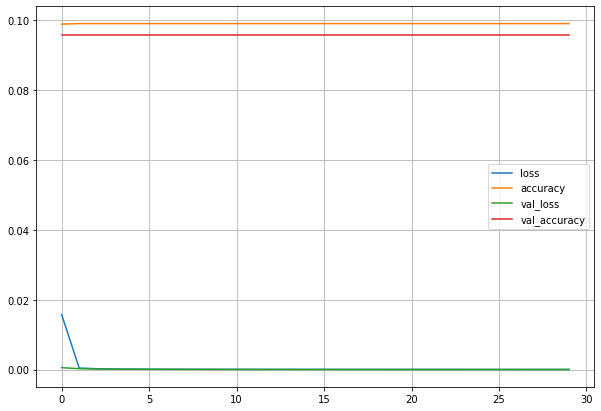

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.show()

In [ ]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 18.5894 - accuracy: 0.0980


[18.589393615722656, 0.09799999743700027]

In [ ]:
10000/32

312.5

In [ ]:
X_new=X_test[:3]
y_prob=model_clf.predict(X_new)
y_prob.round(3)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_prob.shape

(3, 10)

In [ ]:
Y_pred=np.argmax(y_prob,axis=-1)
Y_pred

array([0, 0, 0])

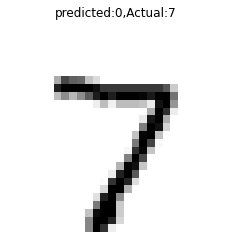

------------------------------------------------------------


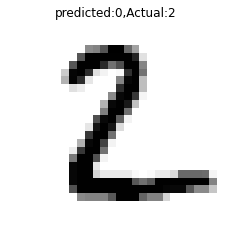

------------------------------------------------------------


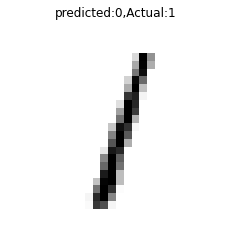

------------------------------------------------------------


In [ ]:
for img_array,pred,actual in zip(X_new,Y_pred,y_test[:3]):
  plt.imshow(img_array,cmap='binary')
  plt.title(f'predicted:{pred},Actual:{actual}')
  plt.axis('off')
  plt.show()
  print('---'*20)
